# Resolvendo problemas de classificação multiclasse

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
CSV_FILE = 'https://caelum-online-public.s3.amazonaws.com/3068-classificacao/Projeto/Dados/dados_estudantes.csv'

## Importação dos dados

In [3]:
df_estudantes = pd.read_csv(CSV_FILE)
df_estudantes.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


## EDA

In [4]:
df_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [5]:
df_estudantes['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [8]:
df_estudantes['Estado civil'].value_counts(normalize=True) * 100

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

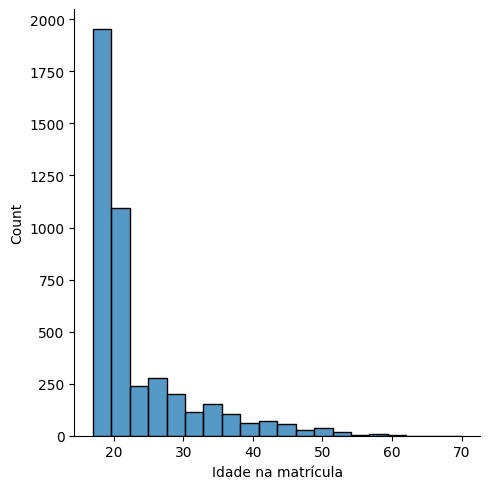

In [9]:
sns.displot(df_estudantes['Idade na matrícula'], bins=20)

In [10]:
sns.set_palette(list({
  'Desistente': '#e34c42',
  'Graduado': '#4dc471',
  'Matriculado': '#3b71db'
}.values()))

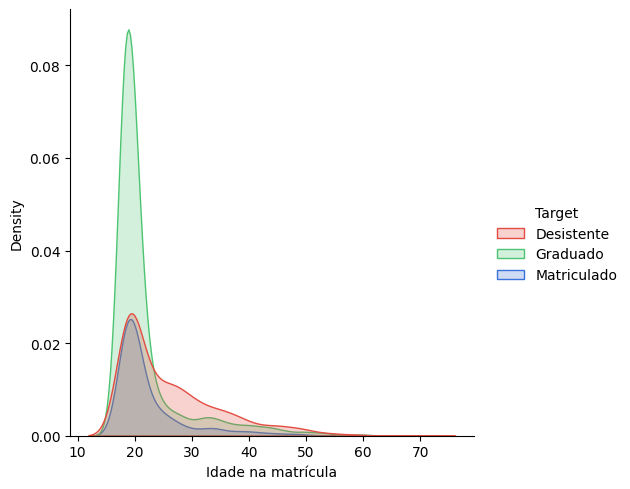

In [15]:
sns.displot(df_estudantes,
            x='Idade na matrícula',
            hue='Target',
            kind='kde',
            fill=True)

In [16]:
df_estudantes['Estrangeiro'].value_counts(normalize=True) * 100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [17]:
df_estudantes['Sexo'].value_counts(normalize=True) * 100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

<Axes: xlabel='Sexo', ylabel='count'>

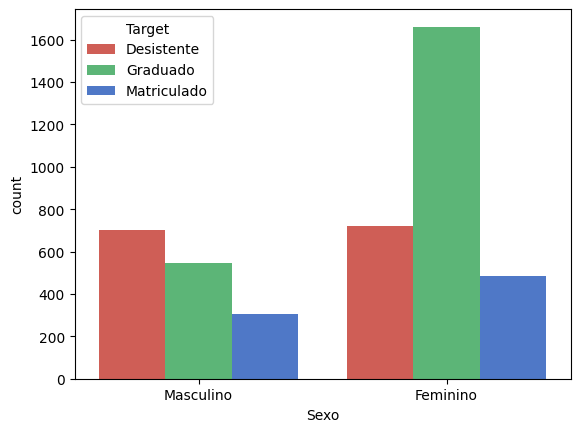

In [18]:
sns.countplot(df_estudantes,
              x='Sexo',
              hue='Target')

<Axes: xlabel='Devedor', ylabel='count'>

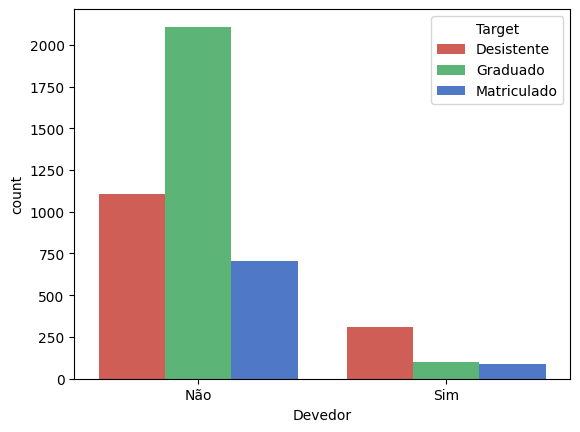

In [19]:
sns.countplot(df_estudantes,
              x='Devedor',
              hue='Target')

<Axes: xlabel='Taxas de matrícula em dia', ylabel='count'>

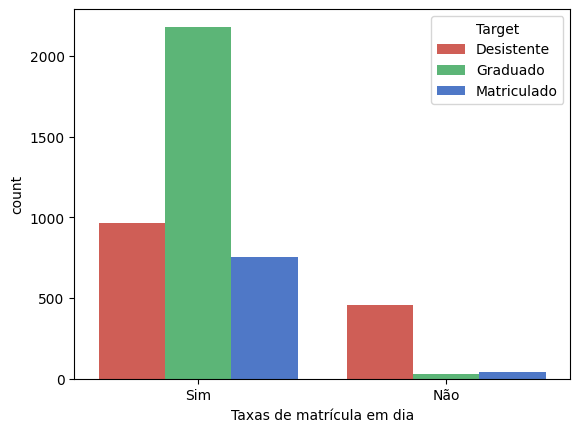

In [21]:
sns.countplot(df_estudantes,
              x='Taxas de matrícula em dia',
              hue='Target')

<Axes: xlabel='Bolsista', ylabel='count'>

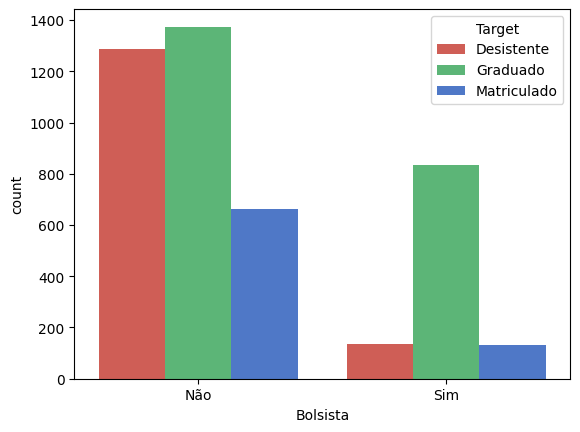

In [22]:
sns.countplot(df_estudantes,
              x='Bolsista',
              hue='Target')

In [23]:
count = df_estudantes.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')
count['Porcentagem'] = count.groupby('Curso')['Contagem'].transform(lambda el: (el / el.sum()) * 100)
px.bar(count,
       y='Curso',
       x='Porcentagem',
       color='Target',
       orientation='h',
       color_discrete_map={
          'Desistente': '#e34c42',
          'Graduado': '#4dc471',
          'Matriculado': '#3b71db'
      })

<Axes: xlabel='Target', ylabel='disciplinas 1º semestre (notas)'>

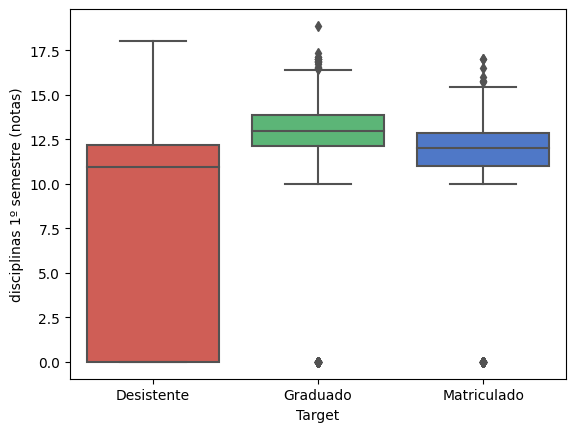

In [24]:
sns.boxplot(df_estudantes,
            y='disciplinas 1º semestre (notas)',
            x='Target')

<Axes: xlabel='Target', ylabel='disciplinas 2º semestre (notas)'>

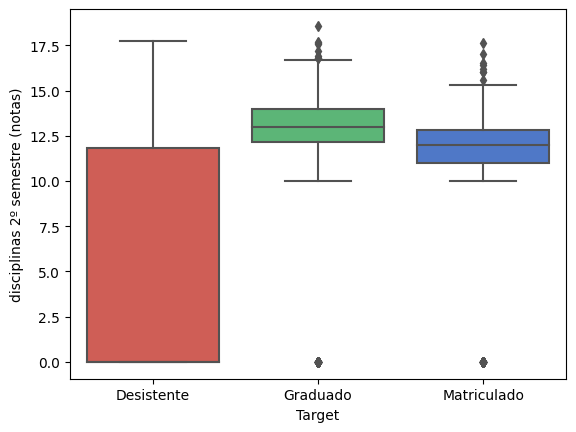

In [25]:
sns.boxplot(df_estudantes,
            y='disciplinas 2º semestre (notas)',
            x='Target')

In [26]:
df_estudantes['Target'].value_counts(normalize=True) * 100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

## Data hangling

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
categorical_columns = ['Migração', 'Sexo',
                       'Estrangeiro', 'Necessidades educacionais especiais',
                       'Devedor', 'Taxas de matrícula em dia',
                       'Bolsista', 'Período','Estado civil',
                       'Curso', 'Qualificação prévia']

In [30]:
df_categorical = df_estudantes[categorical_columns]

In [34]:
encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical).toarray(),
                          columns=encoder.get_feature_names_out(categorical_columns))

In [35]:
df_final = pd.concat([df_estudantes.drop(categorical_columns, axis=1),
                      df_encoded], axis=1)

In [36]:
df_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocessing

In [38]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_final.drop('Target', axis=1)
Y = df_final['Target']

In [39]:
X, x_test, Y, y_test = train_test_split(X, Y,
                                        test_size=.15,
                                        stratify=Y,
                                        random_state=0)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size=.25,
                                                  stratify=Y,
                                                  random_state=0)

## Model training

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Accr: 99.75%
Accr: 76.81%
              precision    recall  f1-score   support

  Desistente       0.80      0.76      0.78       302
    Graduado       0.79      0.93      0.85       469
 Matriculado       0.56      0.34      0.42       169

    accuracy                           0.77       940
   macro avg       0.72      0.68      0.69       940
weighted avg       0.75      0.77      0.75       940



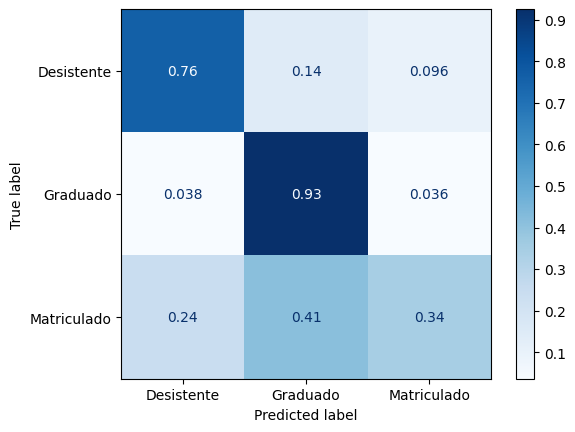

In [64]:
model_rforest = None
model_rforest = RandomForestClassifier(random_state=0)
model_rforest.fit(x_train, y_train)
y_hat = model_rforest.predict(x_val)
print('Accr: %.2f%%' % (model_rforest.score(x_train, y_train) * 100))
print('Accr: %.2f%%' % (accuracy_score(y_val, y_hat) * 100))
print(classification_report(y_val, y_hat))
ConfusionMatrixDisplay.from_predictions(y_val,
                                        y_hat,
                                        normalize='true',
                                        cmap='Blues');

Accr: 89.89%
Accr: 77.34%
              precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



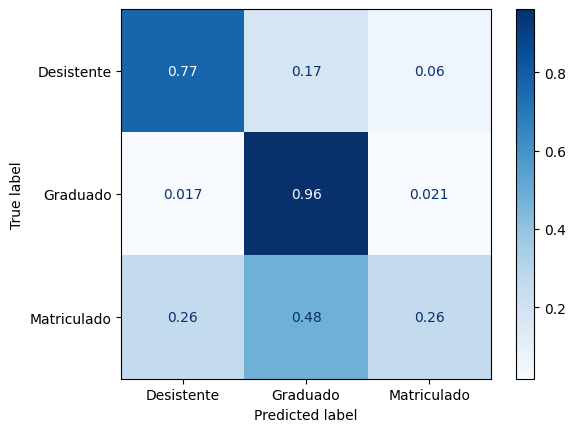

In [65]:
model_rforest = None
model_rforest = RandomForestClassifier(random_state=0,
                                       max_depth=10)
model_rforest.fit(x_train, y_train)
y_hat = model_rforest.predict(x_val)
print('Accr: %.2f%%' % (model_rforest.score(x_train, y_train) * 100))
print('Accr: %.2f%%' % (accuracy_score(y_val, y_hat) * 100))
print(classification_report(y_val, y_hat))
ConfusionMatrixDisplay.from_predictions(y_val,
                                        y_hat,
                                        normalize='true',
                                        cmap='Blues');

## Oversampling

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
oversample = SMOTE(random_state=0)

In [68]:
x_balance, y_balance = oversample.fit_resample(x_train, y_train)

In [70]:
y_balance.value_counts()

Desistente     1408
Graduado       1408
Matriculado    1408
Name: Target, dtype: int64

Accr: 87.20%
Accr: 76.28%
              precision    recall  f1-score   support

  Desistente       0.85      0.72      0.78       302
    Graduado       0.81      0.88      0.84       469
 Matriculado       0.50      0.53      0.51       169

    accuracy                           0.76       940
   macro avg       0.72      0.71      0.71       940
weighted avg       0.77      0.76      0.76       940



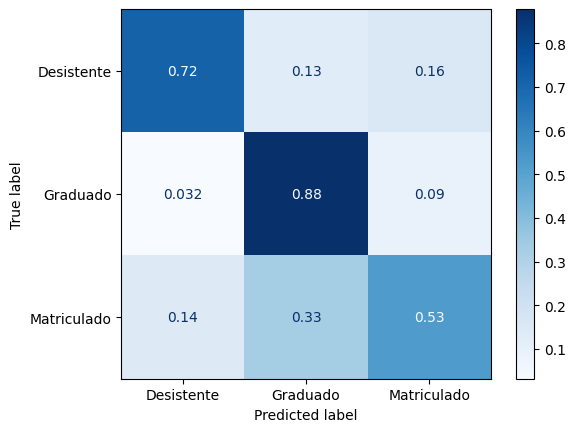

In [72]:
model_rforest = None
model_rforest = RandomForestClassifier(random_state=0,
                                       max_depth=10)
model_rforest.fit(x_balance, y_balance)
y_hat = model_rforest.predict(x_val)
print('Accr: %.2f%%' % (model_rforest.score(x_train, y_train) * 100))
print('Accr: %.2f%%' % (accuracy_score(y_val, y_hat) * 100))
print(classification_report(y_val, y_hat))
ConfusionMatrixDisplay.from_predictions(y_val,
                                        y_hat,
                                        normalize='true',
                                        cmap='Blues');

## Pipeline

In [79]:
from imblearn.pipeline import Pipeline as PipelineIMB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [74]:
model = RandomForestClassifier(random_state=0,
                               max_depth=10)

In [76]:
pipeline = PipelineIMB([
    ('Oversample', SMOTE()),
    ('RandomForest', model)
])

In [77]:
k_folds = StratifiedKFold(random_state=0,
                          n_splits=5,
                          shuffle=True)

In [80]:
cv_results = cross_validate(pipeline,
                            X, Y,
                            cv=k_folds,
                            scoring='recall_weighted')
cv_results

{'fit_time': array([0.65147567, 0.78492236, 1.03069472, 1.04463577, 1.13801908]),
 'score_time': array([0.0246315 , 0.03904819, 0.03731537, 0.03339577, 0.03578949]),
 'test_score': array([0.7712766 , 0.74468085, 0.74867021, 0.76994681, 0.75797872])}

In [83]:
cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

min_confidence_interval = cv_mean - 2 * cv_std
max_confidence_interval = min(cv_mean + 2 * cv_std, 1.0)

print(f'Confidace interval: {min_confidence_interval:.2f} | {max_confidence_interval:.2f}')

Confidace interval: 0.74 | 0.78


## Model testing

              precision    recall  f1-score   support

  Desistente       0.87      0.74      0.80       213
    Graduado       0.82      0.86      0.84       332
 Matriculado       0.49      0.56      0.53       119

    accuracy                           0.77       664
   macro avg       0.73      0.72      0.72       664
weighted avg       0.78      0.77      0.77       664



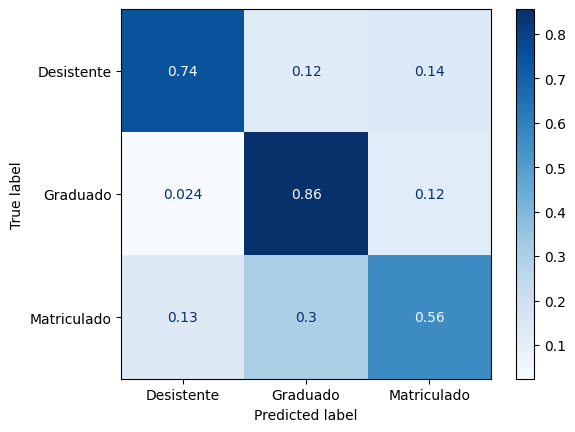

In [84]:
oversample = SMOTE(random_state=0)
x_balance, y_balance = oversample.fit_resample(X, Y)
model = RandomForestClassifier(random_state=0,
                               max_depth=10)
model.fit(x_balance, y_balance)
y_hat = model.predict(x_test)

print(classification_report(y_test, y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_hat,
                                        normalize='true',
                                        cmap='Blues')